In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.


Epoch 1/300
120/120 [==============================] - 0s 2ms/step - loss: 3.1505 - accuracy: 0.3083
Epoch 2/300
120/120 [==============================] - 0s 64us/step - loss: 2.9511 - accuracy: 0.3083
Epoch 3/300
120/120 [==============================] - 0s 75us/step - loss: 2.7686 - accuracy: 0.3083
Epoch 4/300
120/120 [==============================] - 0s 58us/step - loss: 2.5980 - accuracy: 0.3083
Epoch 5/300
120/120 [==============================] - 0s 73us/step - loss: 2.4432 - accuracy: 0.3083
Epoch 6/300
120/120 [==============================] - 0s 57us/step - loss: 2.3011 - accuracy: 0.3083
Epoch 7/300
120/120 [==============================] - 0s 75us/step - loss: 2.1655 - accuracy: 0.3083
Epoch 8/300
120/120 [==============================] - 0s 57us/step - loss: 2.0406 - accuracy: 0.3083
Epoch 9/300
120/120 [==============================] - 0s 72us/step - loss: 1.9284 - accuracy: 0.3083
Epoch 10/300
120/120 [==============================] - 0s 59us/step - loss: 1.8227

120/120 [==============================] - 0s 65us/step - loss: 0.6525 - accuracy: 0.8750
Epoch 81/300
120/120 [==============================] - 0s 54us/step - loss: 0.6475 - accuracy: 0.8917
Epoch 82/300
120/120 [==============================] - 0s 63us/step - loss: 0.6429 - accuracy: 0.8750
Epoch 83/300
120/120 [==============================] - 0s 53us/step - loss: 0.6388 - accuracy: 0.8667
Epoch 84/300
120/120 [==============================] - 0s 62us/step - loss: 0.6339 - accuracy: 0.8750
Epoch 85/300
120/120 [==============================] - 0s 53us/step - loss: 0.6296 - accuracy: 0.8750
Epoch 86/300
120/120 [==============================] - 0s 57us/step - loss: 0.6252 - accuracy: 0.8917
Epoch 87/300
120/120 [==============================] - 0s 52us/step - loss: 0.6209 - accuracy: 0.9000
Epoch 88/300
120/120 [==============================] - 0s 55us/step - loss: 0.6168 - accuracy: 0.9083
Epoch 89/300
120/120 [==============================] - 0s 61us/step - loss: 0.6124 - 

120/120 [==============================] - 0s 57us/step - loss: 0.4273 - accuracy: 0.9667
Epoch 160/300
120/120 [==============================] - 0s 49us/step - loss: 0.4262 - accuracy: 0.9667
Epoch 161/300
120/120 [==============================] - 0s 61us/step - loss: 0.4239 - accuracy: 0.9750
Epoch 162/300
120/120 [==============================] - 0s 53us/step - loss: 0.4223 - accuracy: 0.9750
Epoch 163/300
120/120 [==============================] - 0s 59us/step - loss: 0.4208 - accuracy: 0.9667
Epoch 164/300
120/120 [==============================] - 0s 51us/step - loss: 0.4190 - accuracy: 0.9667
Epoch 165/300
120/120 [==============================] - 0s 60us/step - loss: 0.4174 - accuracy: 0.9750
Epoch 166/300
120/120 [==============================] - 0s 49us/step - loss: 0.4160 - accuracy: 0.9750
Epoch 167/300
120/120 [==============================] - 0s 51us/step - loss: 0.4145 - accuracy: 0.9667
Epoch 168/300
120/120 [==============================] - 0s 54us/step - loss: 

120/120 [==============================] - 0s 51us/step - loss: 0.3208 - accuracy: 0.9833
Epoch 238/300
120/120 [==============================] - 0s 57us/step - loss: 0.3198 - accuracy: 0.9833
Epoch 239/300
120/120 [==============================] - 0s 51us/step - loss: 0.3187 - accuracy: 0.9833
Epoch 240/300
120/120 [==============================] - 0s 48us/step - loss: 0.3176 - accuracy: 0.9833
Epoch 241/300
120/120 [==============================] - 0s 58us/step - loss: 0.3163 - accuracy: 0.9833
Epoch 242/300
120/120 [==============================] - 0s 50us/step - loss: 0.3151 - accuracy: 0.9833
Epoch 243/300
120/120 [==============================] - 0s 59us/step - loss: 0.3143 - accuracy: 0.9833
Epoch 244/300
120/120 [==============================] - 0s 53us/step - loss: 0.3129 - accuracy: 0.9833
Epoch 245/300
120/120 [==============================] - 0s 59us/step - loss: 0.3118 - accuracy: 0.9833
Epoch 246/300
120/120 [==============================] - 0s 56us/step - loss: 

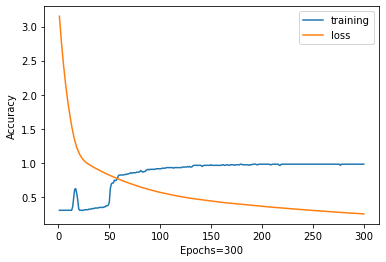

In [2]:
# アヤメのデータ読み込み
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# アヤメデータをラベルと入力データに分離
y_labels = iris_data.loc[:, "Name"]
x_data = iris_data.loc[:, ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]

# ラベルデータをOne-Hotベクトルの変換
labels = {
    "Iris-setosa": [1, 0, 0],
    "Iris-versicolor": [0, 1, 0],
    "Iris-virginica": [0, 0, 1]
}
y_nums = np.array(list(map(lambda v: labels[v], y_labels)))
x_data = np.array(x_data)

# 学習用とテスト用に分割
x_train, x_test, y_train, y_test = train_test_split(x_data, y_nums, train_size=0.8)

# モデルの定義
model = Sequential()
model.add(Dense(10, activation="relu", input_shape=(4,)))
model.add(Dense(3, activation="softmax"))

# モデルの構築
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

epochs = 300

# 学習を実行
result = model.fit(x_train, y_train, batch_size=20, epochs=epochs)

# モデルを評価
score = model.evaluate(x_test, y_test, verbose=1)
print(f"正解率={score[1]}, loss={score[0]}")


# 学習の様子をグラフに描画
plt.plot(range(1, epochs+1), result.history["accuracy"], label="training")
plt.plot(range(1, epochs+1), result.history["loss"], label="loss")
plt.xlabel(f"Epochs={str(epochs)}")
plt.ylabel("Accuracy")
plt.legend()
plt.show()